# One-class SVM for detection of outliers and others methods

In [1]:
# first we import the following libraries. sys ans seaborn can be removed.The others cannot be removed.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
import sys
sns.set(color_codes=True)
%matplotlib inline

Example of One-Class SVM for one data set

In [2]:
#read data set associate with eq.ratio 0.5, the data set must be in the same folder where the python file is. 
#In other case, before the name of the csv file, the location where the csv file is must be provided. As it follows
#'location/name csv file.csv'
dataset=pd.read_csv("data_0.5_1.csv",header=None)                                       

In [3]:
X=dataset.values[:,[0,4]] # data points column 0: time, column=4 air volumetric flow

In [4]:
print(X) #check inputs

[[ 60.71675    1.642857]
 [ 60.967273   1.640473]
 [ 61.216496   1.637895]
 ...
 [240.006323   1.645287]
 [240.243706   1.648076]
 [240.492084   1.645985]]


Importing One Class SVM for detecting outliers

important: data must be rescaled in order to compare features in a correct way and be ablo to identify main trend and noise and undesired trends

In [5]:
from sklearn.svm import OneClassSVM    #import one-class svm from sklearn
from sklearn.preprocessing import StandardScaler #import StandardScaler for rescaling data
sc=StandardScaler()                              #instantiate standardScaler
X_train=sc.fit_transform(X)     #fit standard scaler to data set
outliers_fraction=0.35  #define our prior belief of outliers.this is a parameter that user must provide in advance to the method
stime=time.time()       #import time.time() to measure the time fitting by one-class svm 

# define method, clf is a name. It can be changed by the user. Oneclass has the following parameters:
# kernel=kernel tranformstion used, it can be 'rbf', 'linear', 'poly' and linear combination and/or operations between them.
# choice of kernel influences strongly the performance of the model. Some problem might perform better using other kernels 
# instead of 'rbf'. Additionally, sometimes One-class SVM is not the best option and other methods can be used as the other 
# that will be shown later.
# nu: proportions of outliers, also known as contamination. It must be provided by the user. If it is not provided, the default
# value is 0.5. gamma: parameters related to the optimization problem that SVM methodology solves. Use always 'scale'.
# clf is an arbitrary name. It can be changed by the user

clf = OneClassSVM(kernel='rbf',nu=outliers_fraction,gamma='scale').fit(X_train) #fit one-class SVM to data set.
print("Time for One class SVM fitting: %.3f" % (time.time() - stime)) #measure fitting time
stime=time.time() #it is used for measuring prediction time
print(clf.predict(X_train))  # one-class svm classifyng inliers from outliers. 1=inliers, -1=outliers
print("Time for One class SVM predicting: %.3f" % (time.time() - stime)) #prediction time
z=clf.predict(X_train) #save classification that will be used for removing outliers

Time for One class SVM fitting: 0.237
[-1 -1 -1 ... -1 -1 -1]
Time for One class SVM predicting: 0.083


Cleaning data

In [6]:
n=len(X_train) # number of data points
X_list=X_train.tolist() #transform data points to a list
print(n)  #checking number of data points (optional)
stime=time.time() #measuring time python routine takes to remove outliers
#loop that goes through each data points and check if it is outliers or inliers. If it is outliers, it will be removed from the
#list.Otherwise, it will be conserved.
for i in range(0,n):
   if (z[n-1-i]==[-1]):    #checking if data point was classified as outlier
       X_list.remove(X_list[n-1-i])  #removing outlier
print("Time for removing outliers: %.3f" % (time.time() - stime)) #time for routine removing outliers
print(len(X_list))                       #print number of points after removing outliers
X_list=sc.inverse_transform(np.array(X_list)) #undo the rescaling. Return data points to oirginal scale. always 
                                              #'namescaling'.inverse_transform(np.array(data)), np.array used to transform data 
                                              # to an array

3600
Time for removing outliers: 0.111
2342


Plot dataset before and after removing outliers

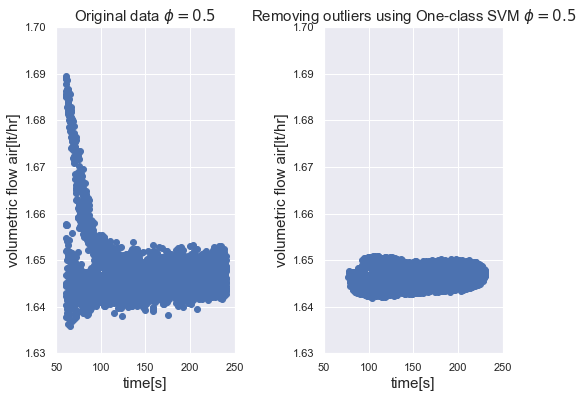

In [7]:
fig=plt.figure(figsize=(8,6)) #defining figure
plt1=fig.add_subplot(121)     #plot at the left
plt2=fig.add_subplot(122)     #plot at the right
plt1.scatter(X[:,0],X[:,1])  #original data set
plt1.set_xlim(50, 250)       #x limits in order to visualize in a better way. it is optional
plt1.set_ylim(1.63, 1.7)     #y limits
plt1.set_title('Original data $\phi= 0.5$',fontsize=15) #title
plt1.set_xlabel('time[s]',fontsize=15)                  # x label
plt1.set_ylabel('volumetric flow air[lt/hr]',fontsize=15) #y label
plt2.scatter(X_list[:,0],X_list[:,1])      #data set after removing outliers
plt2.set_xlim(50, 250)  #same reasons explained previously
plt2.set_ylim(1.63, 1.7)
plt2.set_title('Removing outliers using One-class SVM $\phi=0.5$',fontsize=15)
plt2.set_xlabel('time[s]',fontsize=15)
plt2.set_ylabel('volumetric flow air[lt/hr]',fontsize=15)
fig.subplots_adjust(hspace=0.5,wspace=0.5) #margin between two plots
plt.show()

 # Elliptic envelope for detection of outliers

another method for removing outliers. It assumes that data points have a gaussian distribution. It fits an ellipsoid that will classify (1-$\nu$)*100% of the data points as inliers and $\nu$*100% as outliers.
It is very robust, it is the safest method. However, it will only provides results that will have an elliptical shape.Therefore, it will often misclassify points as outliers. Also for many features, it will performance not so well.

In [8]:
from sklearn.covariance import EllipticEnvelope #import elliptic envelope method

In [9]:
stime=time.time()
cov=EllipticEnvelope(contamination=0.35,random_state=0).fit(X) #fitting elliptic envelope for detecting outliers
print("Time for elliptic envelope fitting: %.3f" % (time.time() - stime)) #fitting time 

Time for elliptic envelope fitting: 2.242


data cleaning using elliptic envelope

In [10]:
#similar routine used in the previous case of One-Class SVM.

stime=time.time()
z1=cov.predict(X) #elliptic envelope classifying inliers and outliers
print("Time for elliptic envelope predicting: %.3f" % (time.time() - stime)) #time elliptic envelope fitting data set
n1=len(X)
X_list1=X.tolist()
print(n1)
for i in range(0,n1):
   if (z1[n-1-i]==[-1]):
       X_list1.remove(X_list1[n-1-i])
print(len(X_list1))
#print(np.array(X_list))

Time for elliptic envelope predicting: 0.003
3600
2340


Plotting data set before and after removing outliers

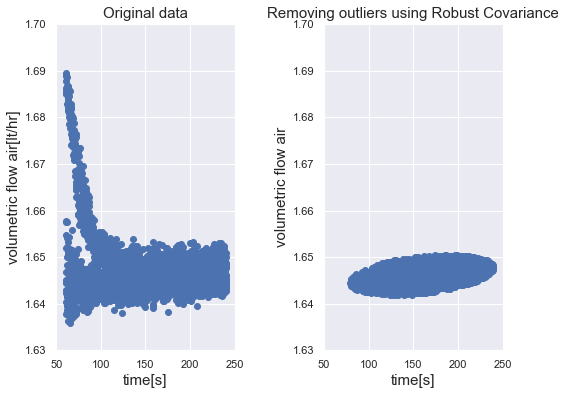

In [11]:
# similar plot used for One-Class SVM, same procedure
fig=plt.figure(figsize=(8,6))
plt1=fig.add_subplot(121)
plt2=fig.add_subplot(122)
plt1.scatter(X[:,0],X[:,1])
plt1.set_xlim(50, 250)
plt1.set_ylim(1.63, 1.7)
plt1.set_title('Original data',fontsize=15)
plt1.set_xlabel('time[s]',fontsize=15)
plt1.set_ylabel('volumetric flow air[lt/hr]',fontsize=15)
plt2.scatter(np.array(X_list1)[:,0],np.array(X_list1)[:,1])
plt2.set_xlim(50, 250)
plt2.set_ylim(1.63, 1.7)
plt2.set_title('Removing outliers using Robust Covariance',fontsize=15)
plt2.set_xlabel('time[s]',fontsize=15)
plt2.set_ylabel('volumetric flow air',fontsize=15)
fig.subplots_adjust(hspace=.5,wspace=0.5) 
plt.show()

scatter plots of air and hidrogen volumetric flow respect time

33


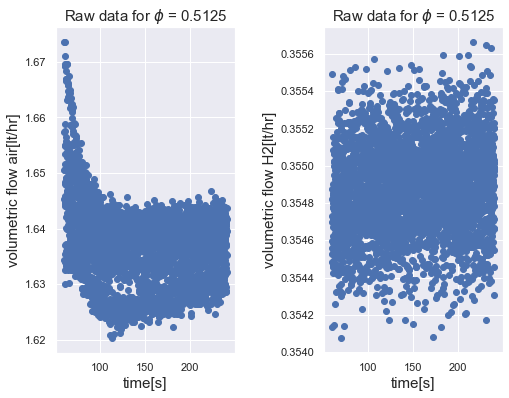

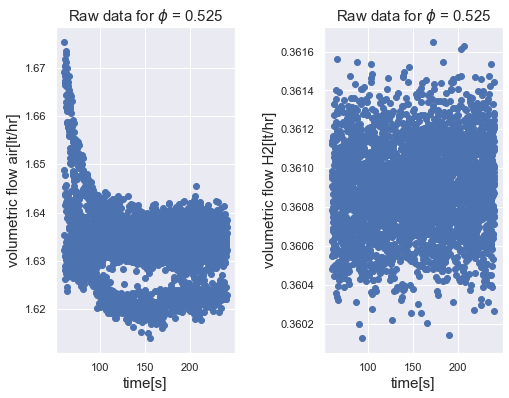

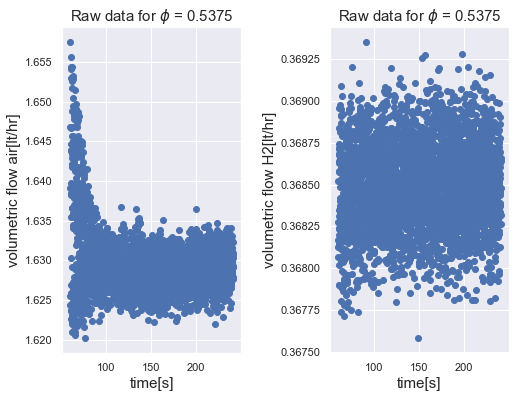

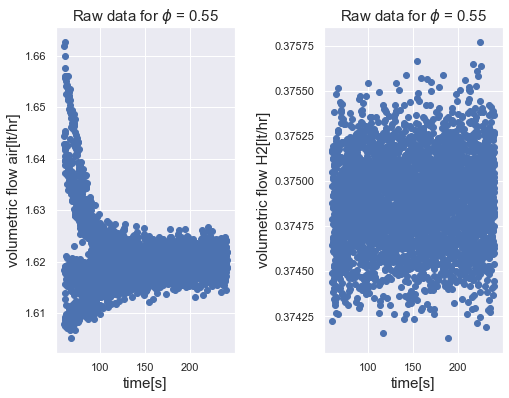

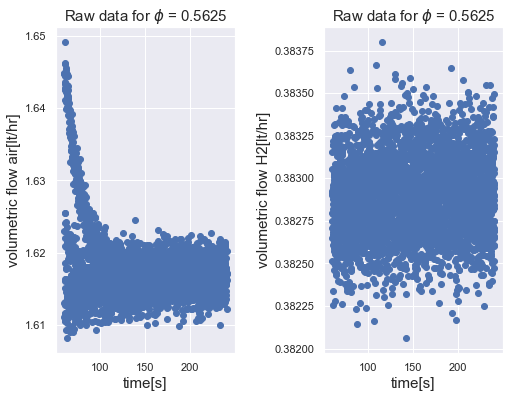

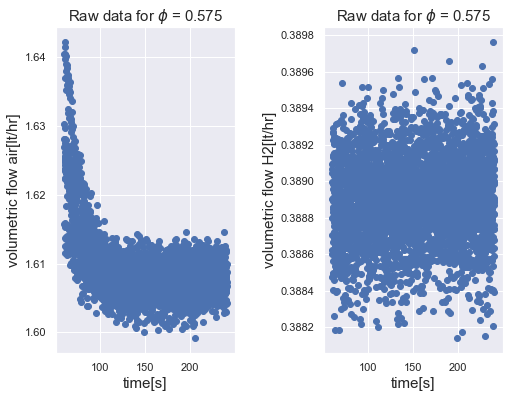

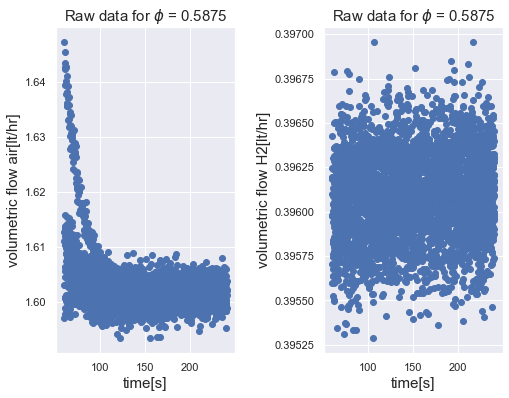

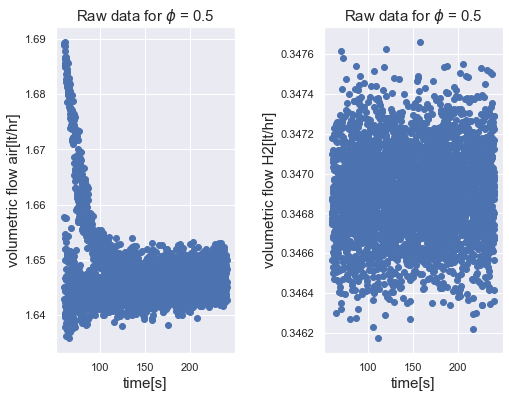

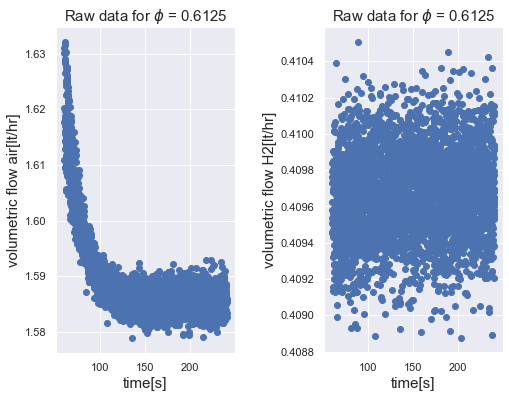

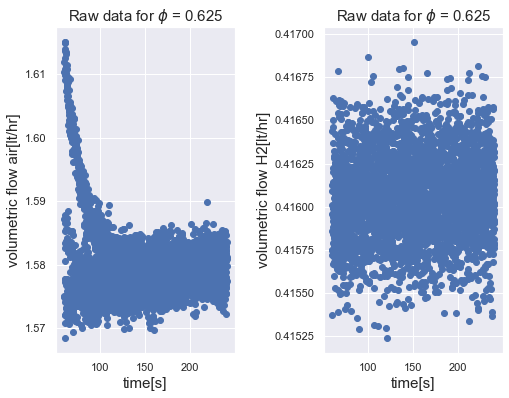

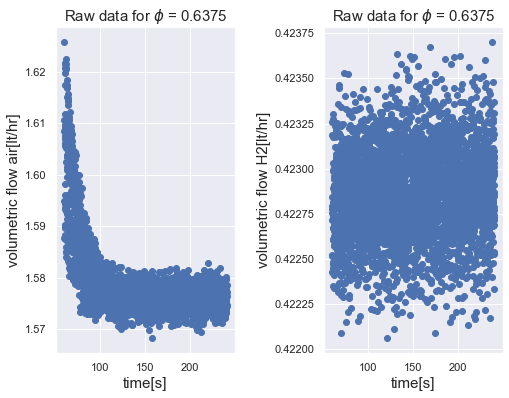

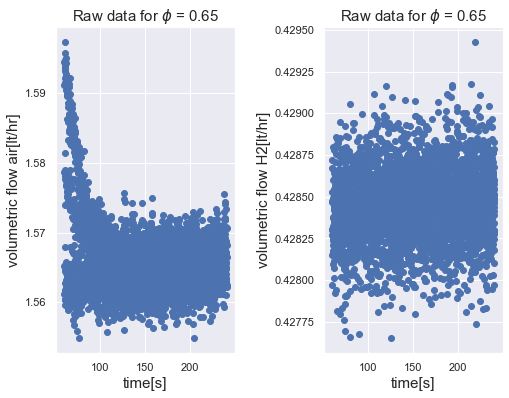

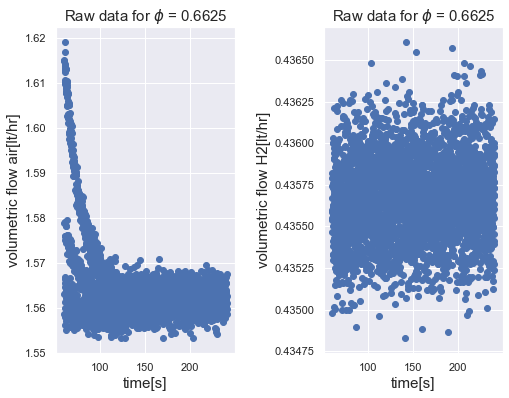

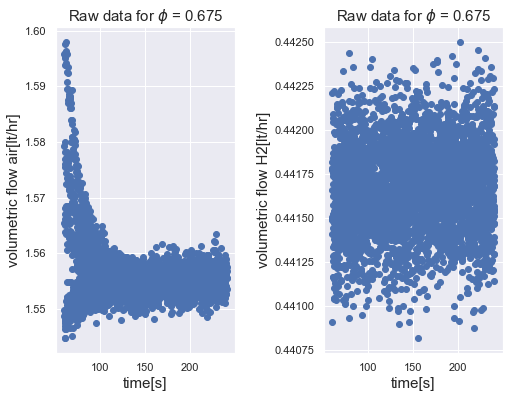

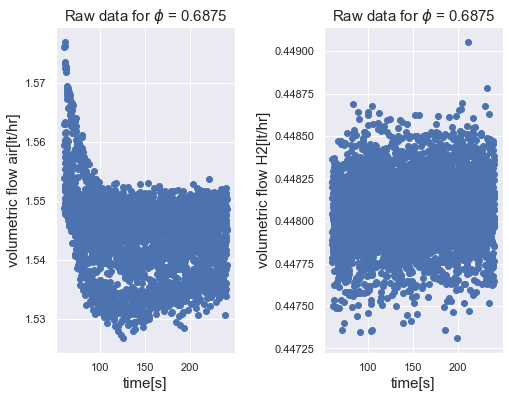

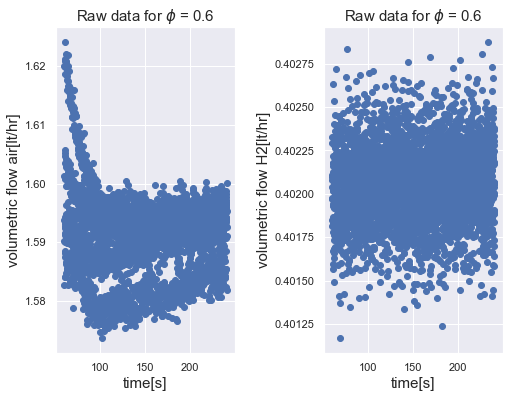

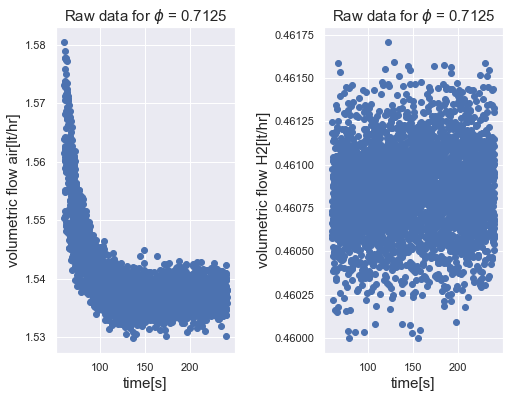

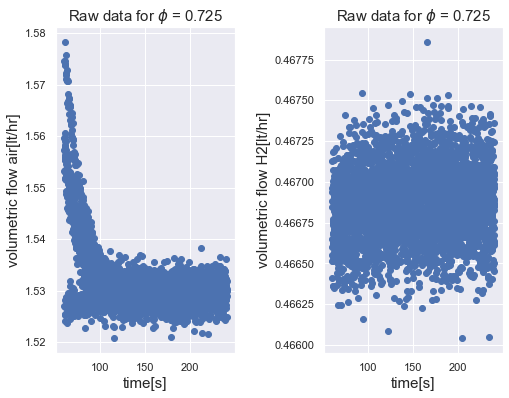

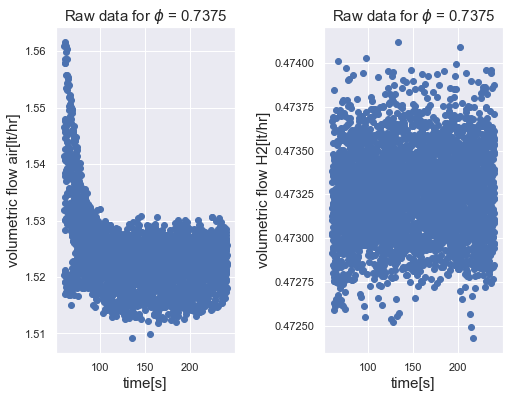

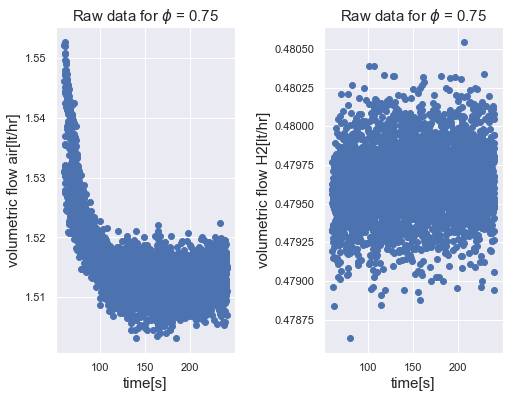

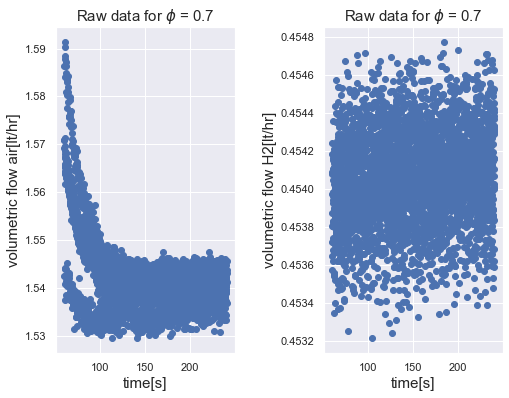

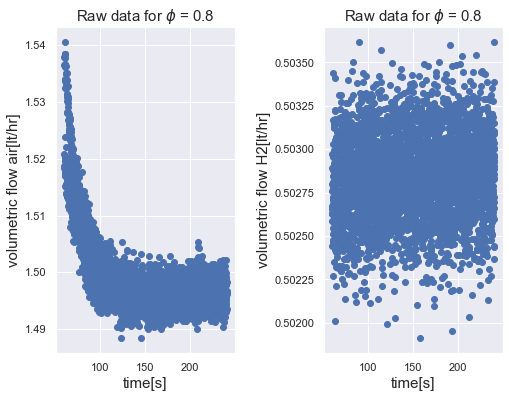

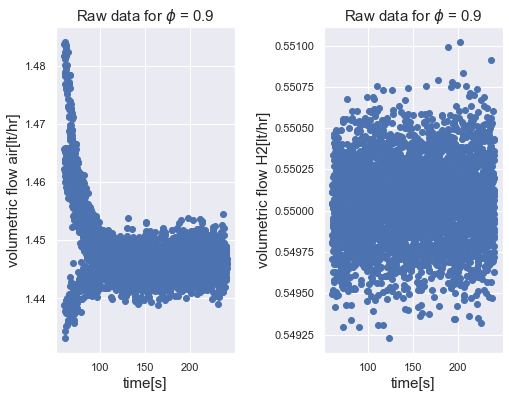

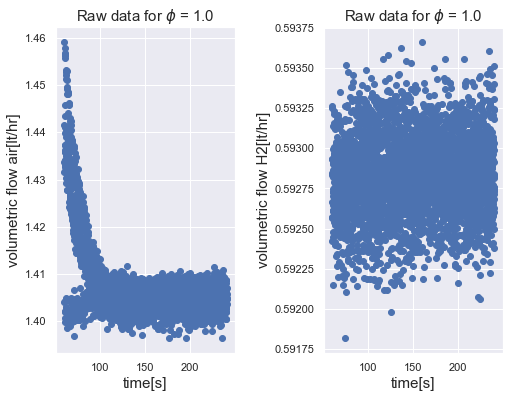

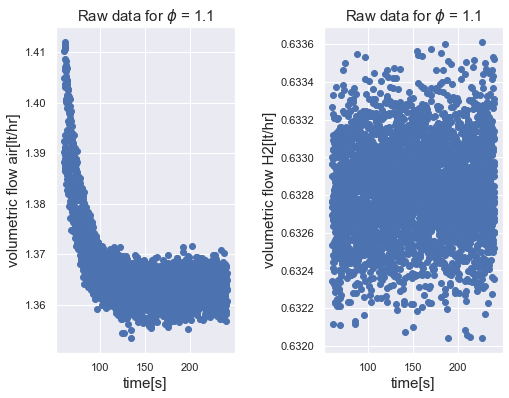

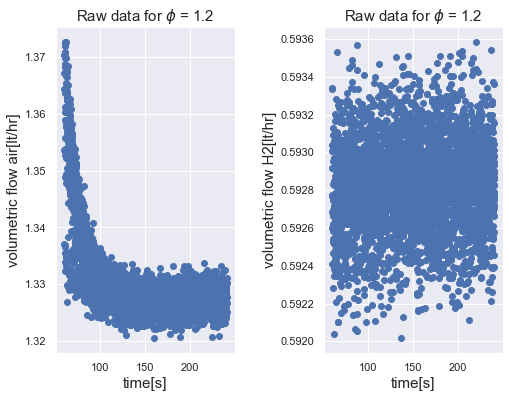

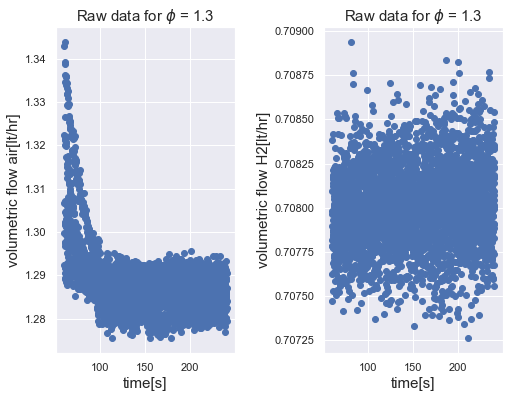

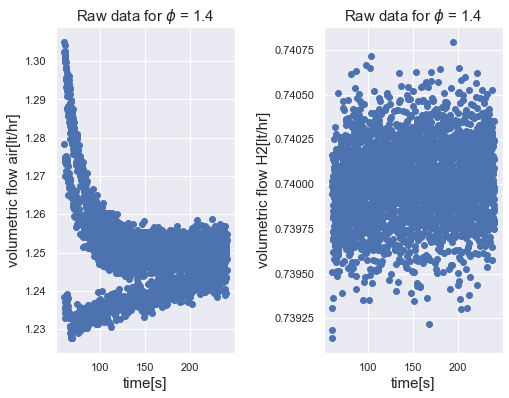

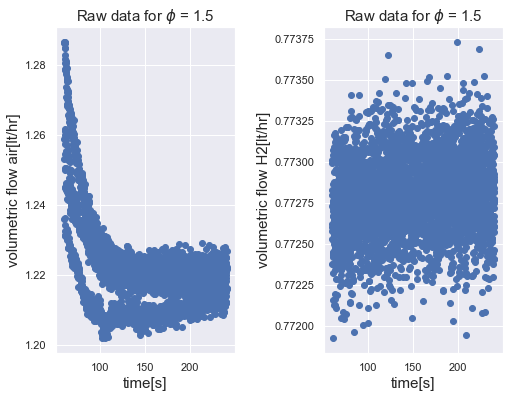

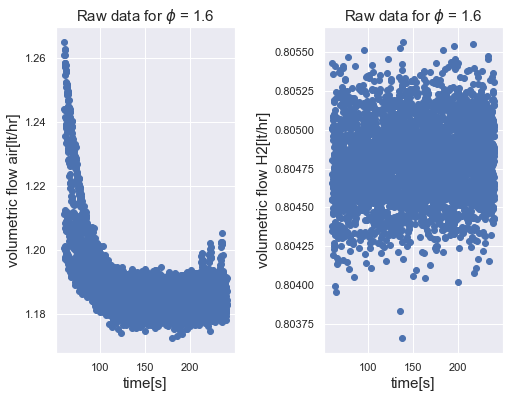

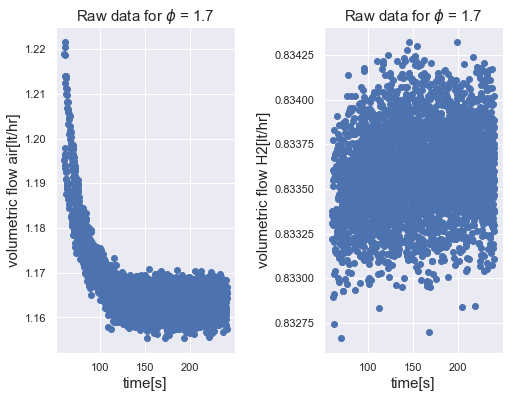

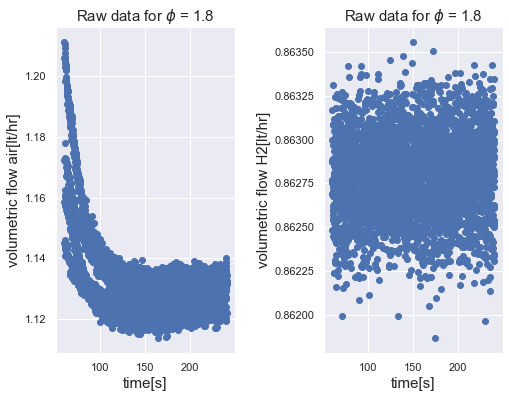

In [12]:
#routine for visualizing each data set
import os   #library for reading files in a specific directory
#counting number of files at a certain directory
max=0 
for files in os.listdir('Data/Data_svenja_csv'):
    max=max+1
print(max)

#routine for reading and plotting each csv files at directory 'Data/Data_svenja_csv'
for j in range(1,max):
    name=os.listdir('Data/Data_svenja_csv')[j] #reading name of the csv file
    dataset=pd.read_csv(name,header=None)      #reading data of file name
    X=dataset.values[:,[0,4,5]]                #reading time and air and hydrogen volumetric flows 
    fig=plt.figure(figsize=(8,6))              #plotting air and hydrogen volumetric flow respect time,scatter plots.
    plt1=fig.add_subplot(121)                  #same structure used in the previous plots
    plt2=fig.add_subplot(122)
    plt1.scatter(X[:,0],X[:,1])
    plt1.set_title('Raw data for $\phi$ = '+name.split('_')[1],fontsize=15)
    plt1.set_xlabel('time[s]',fontsize=15)
    plt1.set_ylabel('volumetric flow air[lt/hr]',fontsize=15)
    plt2.scatter(X[:,0],X[:,2])
    plt2.set_title('Raw data for $\phi$ = '+name.split('_')[1],fontsize=15)
    plt2.set_xlabel('time[s]',fontsize=15)
    plt2.set_ylabel('volumetric flow H2[lt/hr]',fontsize=15)
    fig.subplots_adjust(hspace=.5,wspace=0.5) 
    plt.show()

Succesive identification of outliers

We apply One-class SVM for removing outliers succesively first with respect to air and ,afterthat, with respect to hydrogen
$\nu$ for air is 0.35 and for hydrogen is $\nu=0.05$. In total,around $40\%$ of the data will be removed. These percentajes can be changed by the user. Same procedure can be applied using elliptic envelope instead of one class svm.

In [13]:
dataset=pd.read_csv("data_0.5_1.csv",header=None) #read data set
X2=dataset.values[:,[0,4,5]] #array considering time: column=0 , air and hydrogen volumetric flows :columns 4 and 5 respectively

In [14]:
X2 # check data points (optional)

array([[ 60.71675 ,   1.642857,   0.346867],
       [ 60.967273,   1.640473,   0.346762],
       [ 61.216496,   1.637895,   0.346852],
       ...,
       [240.006323,   1.645287,   0.347122],
       [240.243706,   1.648076,   0.347009],
       [240.492084,   1.645985,   0.3468  ]])

first cleaning volumetric flow air

In [15]:
#always data must be rescaled. In this case, StandardScaler is used. it transforms data set to a data set with mean value=1 and 
# standard deviation=1. Other scaling tool such as MinmaxScaler can eventually used. For the data set, StandardScaler works be-
# tter. 
from sklearn.preprocessing import StandardScaler #import StandardScaler from sklearn
sc_input=StandardScaler()                        #instantiate StandardScaler
X2_scale=sc_input.fit_transform(X2)              #fit StandardScaler to data set

In [16]:
#implement one-class SVM, same considerations explaining previously.
from sklearn.svm import OneClassSVM   #import One-clas SVM
outliers_fraction=0.35                #Defining proportion of outliers
clf2 = OneClassSVM(kernel='rbf',nu=outliers_fraction,gamma='scale').fit(X2_scale[:,[0,1]]) #fitting method to data set
print(clf2.predict(X2_scale[:,[0,1]]))        #data points classified as inliers=1 or outliers=-1
z2=clf2.predict(X2_scale[:,[0,1]])   #save classification

[-1 -1 -1 ... -1 -1 -1]


In [17]:
#routine for removing outliers
n2=len(X2_scale)
X_list2=X2_scale.tolist() #convert data points to list
print(n2)
for i in range(0,n2): 
   if (z2[n2-1-i]==[-1]): #if points is classified as outlier,it will be remove.Otherwise, it should be conserved.
       X_list2.remove(X_list2[n2-1-i]) #removing outlier from data set
        
print(len(X_list2)) #number of data points after removing outliers respect air
X_list2=sc_input.inverse_transform(np.array(X_list2)) #return data to original scale.
#print(X_list2[1])

3600
2342


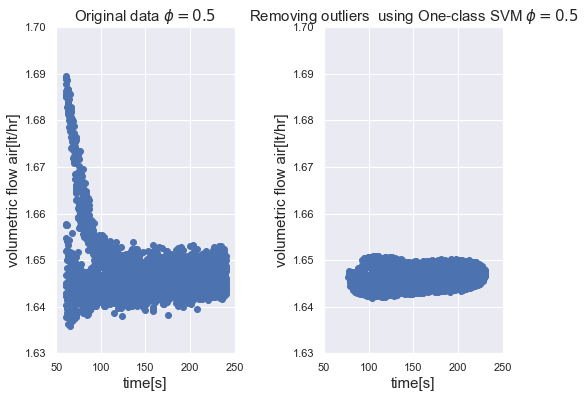

In [18]:
#plotting air volumetric flow with respect time before and after removing outliers. Similar plot to the ones explained previously
fig=plt.figure(figsize=(8,6))
plt1=fig.add_subplot(121)
plt2=fig.add_subplot(122)
plt1.scatter(X2[:,0],X2[:,1])
plt1.set_xlim(50, 250)
plt1.set_ylim(1.63, 1.7)
plt1.set_title('Original data $\phi=0.5$',fontsize=15)
plt1.set_xlabel('time[s]',fontsize=15)
plt1.set_ylabel('volumetric flow air[lt/hr]',fontsize=15)
plt2.scatter(X_list2[:,0],X_list2[:,1])
plt2.set_xlim(50, 250)
plt2.set_ylim(1.63, 1.7)
plt2.set_title('Removing outliers  using One-class SVM $\phi=0.5$',fontsize=15)
plt2.set_xlabel('time[s]',fontsize=15)
plt2.set_ylabel('volumetric flow air[lt/hr]',fontsize=15)
fig.subplots_adjust(hspace=.5,wspace=0.5) 
plt.show()

second cleaning volumetric air flow

In [19]:
# we repeat the implementation explained above respect to hydrogen. Note that the method is applied to the data set after 
# removing outlier respect to air. It means the data set is X_list2 (output of the previous step)
from sklearn.preprocessing import StandardScaler
sc_input_1=StandardScaler()                     #instantiate again the scaling tool, because it will be fit to the new data set
X3=sc_input_1.fit_transform(X_list2)            #fit to new data set
outliers_fraction_1=0.05               #fraction of outliers for hydrogen
clf3 = OneClassSVM(kernel='rbf',nu=outliers_fraction_1,gamma='scale').fit(X3[:,[0,2]])
print(clf3.predict(X3[:,[0,2]]))
z3=clf3.predict(X3[:,[0,2]])
print(X3)

[-1 -1  1 ... -1 -1 -1]
[[-1.87822806 -0.84658484 -1.23283573]
 [-1.82292453 -1.27720624 -1.26917489]
 [-1.81066059 -1.25376412  0.09808627]
 ...
 [ 1.75243672 -0.18765766  1.02927743]
 [ 1.77700907  0.08804196 -1.61893938]
 [ 1.78318216  0.22359852 -1.95961907]]


In [20]:
#routine for removing outliers after one-class svm classified them.
n3=len(X3)
X_list3=X3.tolist()
print(n3)
for i in range(0,n3):
   if (z3[n3-1-i]==[-1]):
       X_list3.remove(X_list3[n3-1-i])
print(len(X_list3)) # data points after removing outliers respect hidrogen

2342
2223


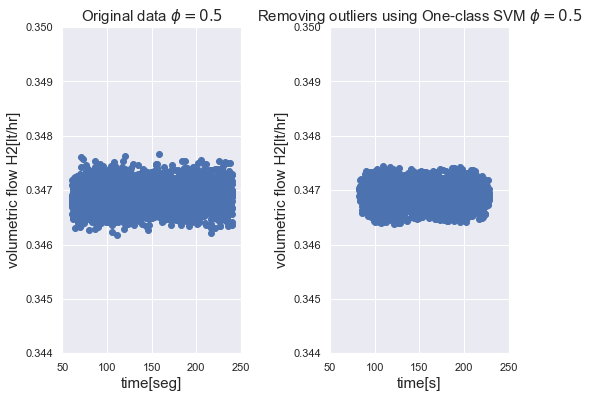

2342 2223


In [21]:
#plotting hidrogen volumetric flow with respect time before and after removing outliers.
X_list3=sc_input_1.inverse_transform(np.array(X_list3)) #return data to original scale. always in this way:
                                                        # 'name'.inverse_transform(np.array(data))
fig=plt.figure(figsize=(8,6))
plt1=fig.add_subplot(121)
plt2=fig.add_subplot(122)
plt1.scatter(X2[:,0],X2[:,2])
plt1.set_xlim(50, 250)
plt1.set_ylim(0.344, 0.35)
plt1.set_title('Original data $\phi=0.5$',fontsize=15)
plt1.set_xlabel('time[seg]',fontsize=15)
plt1.set_ylabel('volumetric flow H2[lt/hr]',fontsize=15)
plt2.scatter(X_list3[:,0],X_list3[:,2])
plt2.set_xlim(50, 250)
plt2.set_ylim(0.344, 0.35)
plt2.set_title('Removing outliers using One-class SVM $\phi=0.5$',fontsize=15)
plt2.set_xlabel('time[s]',fontsize=15)
plt2.set_ylabel('volumetric flow H2[lt/hr]',fontsize=15)
fig.subplots_adjust(hspace=.5,wspace=0.5) 
plt.show()
print(len(X3),len(X_list3))

Data after removing outliers

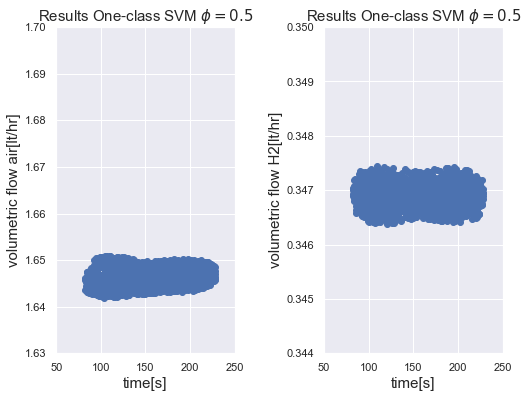

In [24]:
#plot volumetric flow of air an hidrogen after removing outliers with respect time
fig=plt.figure(figsize=(8,6))
plt1=fig.add_subplot(121)
plt2=fig.add_subplot(122)
plt1.scatter(X_list3[:,0],X_list3[:,1])
plt1.set_xlim(50, 250)
plt1.set_ylim(1.63, 1.7)
plt1.set_title('Results One-class SVM $\phi=0.5$',fontsize=15)
plt1.set_xlabel('time[s]',fontsize=15)
plt1.set_ylabel('volumetric flow air[lt/hr]',fontsize=15)
plt2.scatter(X_list3[:,0],X_list3[:,2])
plt2.set_xlim(50, 250)
plt2.set_ylim(0.344, 0.35)
plt2.set_title('Results One-class SVM $\phi=0.5$',fontsize=15)
plt2.set_xlabel('time[s]',fontsize=15)
plt2.set_ylabel('volumetric flow H2[lt/hr]',fontsize=15)
fig.subplots_adjust(hspace=.5,wspace=0.5) 
plt.show()

# Local Outliers Factor

this is another method for Detecting outliers. This methods is based on the density of data points. It classifies points as outlier where the density of points is smaller in comparison to points that are in the denser areas (main trend). This method might good well when we have only noise, or points that are isolated from the others. For this data set, its performance is very bad because the undesired trend is not isolated and the data set has some holes. So ,as it will be shown in the results, this method eliminates points in the main trend when there are holes in it.

In [25]:
# the implementation is very similar to the previous methods.
from sklearn.neighbors import LocalOutlierFactor  #import method from sklearn
X4 = pd.read_csv('data_0.5125_1.csv',header=None).values[:,[0,4]] #read time and air volumetric flows
sc_input4=StandardScaler()
X4_scale=sc_input4.fit_transform(X4)
stime=time.time()
# the parameters of this method are :n_neighbors=number of points that will be considered in order to decide if in the neighboor
# of a points, the density is high (small volume) or small(large volume), contamination: proportion of outliers 
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.35).fit(X4_scale) #fitting to data set
print("Time for Local outliers factor fitting: %.3f" % (time.time() - stime))
stime=time.time()
z4=clf.fit_predict(X4_scale)  #method classifying inliers from outliers
print("Time for Local outliers factor predicting: %.3f" % (time.time() - stime))

Time for Local outliers factor fitting: 0.026
Time for Local outliers factor predicting: 0.023


In [26]:
#same routine as the ones explained in the previous methods.
n4=len(X4)
X_list4=X4_scale.tolist()
print(n4)
for i in range(0,n4):
   if (z4[n-1-i]==[-1]):
       X_list4.remove(X_list4[n-1-i])
print(len(X_list4))
X_list4=sc_input4.inverse_transform(np.array(X_list4))

3600
2340


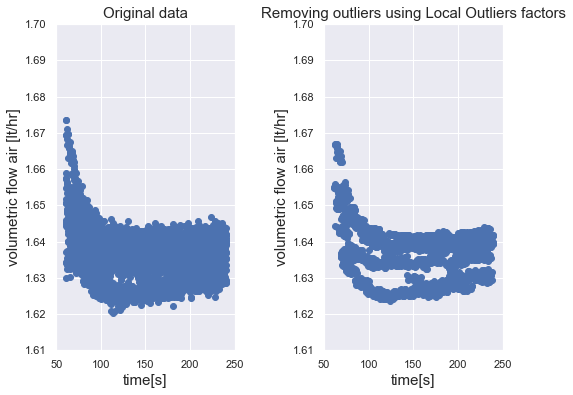

In [27]:
#plotting data before and after removing outliers using local outliers factors.
# similar procedure for constructing the previous plots
fig=plt.figure(figsize=(8,6))
plt1=fig.add_subplot(121)
plt2=fig.add_subplot(122)
plt1.scatter(X4[:,0],X4[:,1])
plt1.set_xlim(50, 250)
plt1.set_ylim(1.61, 1.7)
plt1.set_title('Original data',fontsize=15)
plt1.set_xlabel('time[s]',fontsize=15)
plt1.set_ylabel('volumetric flow air [lt/hr]',fontsize=15)
plt2.scatter(np.array(X_list4)[:,0],np.array(X_list4)[:,1])
plt2.set_xlim(50, 250)
plt2.set_ylim(1.61, 1.7)
plt2.set_title('Removing outliers using Local Outliers factors',fontsize=15)
plt2.set_xlabel('time[s]',fontsize=15)
plt2.set_ylabel('volumetric flow air [lt/hr]',fontsize=15)
fig.subplots_adjust(hspace=.5,wspace=0.5) 
plt.show()

# IsolationForest

This method is based on a construction of a decision tree which splits the data set and search for data points that are isolated or different trends to the main trend. This method was not explained on the report because there was not enough time to investigate it more in detail. However, this is applied to a data set and its results look quite good. So, it could be a good idea to investigate more about it in the future in order to have a second method in case that one-svm fails.

In [28]:
from sklearn.ensemble import IsolationForest #import method from sklearn.ensemble
X5 = pd.read_csv('data_0.5_1.csv',header=None).values[:,[0,4]]
stime=time.time()
# isolation forest need only one parameter, which is the contamination=proportion of outliers, random_state=0 can be any number
# and it is fixed in order to begin the decision tree always at the same point. this is done in order to build every time the
# same decision tree.
clf =IsolationForest(contamination=0.35,random_state=0).fit(X5) #fit isolation forest to data set
print("Time for Isolation Forest fitting: %.3f" % (time.time() - stime))
stime=time.time()
z5=clf.fit_predict(X5) #classify outliers from inliers
print("Time for isolation forest  predicting: %.3f" % (time.time() - stime))

Time for Isolation Forest fitting: 0.298
Time for isolation forest  predicting: 0.429


In [29]:
# routine for removing outliers, similar to the ones explained in the previous examples
n5=len(X5)
X_list5=X5.tolist()
print(n5)
for i in range(0,n5):
   if (z5[n-1-i]==[-1]):
       X_list5.remove(X_list5[n-1-i])
print(len(X_list5))

3600
2340


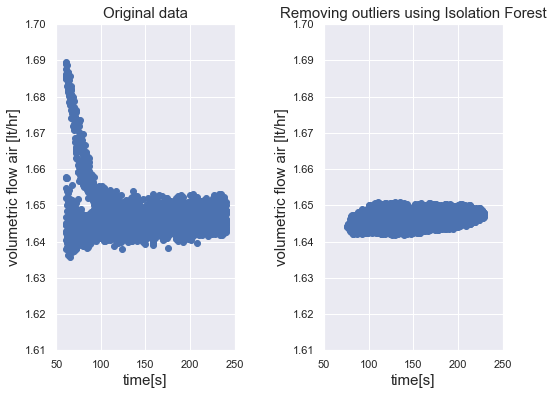

In [30]:
# plot the results before and after removing outliers.
fig=plt.figure(figsize=(8,6))
plt1=fig.add_subplot(121)
plt2=fig.add_subplot(122)
plt1.scatter(X5[:,0],X5[:,1])
plt1.set_xlim(50, 250)
plt1.set_ylim(1.61, 1.7)
plt1.set_title('Original data',fontsize=15)
plt1.set_xlabel('time[s]',fontsize=15)
plt1.set_ylabel('volumetric flow air [lt/hr]',fontsize=15)
plt2.scatter(np.array(X_list5)[:,0],np.array(X_list5)[:,1])
plt2.set_xlim(50, 250)
plt2.set_ylim(1.61, 1.7)
plt2.set_title('Removing outliers using Isolation Forest',fontsize=15)
plt2.set_xlabel('time[s]',fontsize=15)
plt2.set_ylabel('volumetric flow air [lt/hr]',fontsize=15)
fig.subplots_adjust(hspace=.5,wspace=0.5) 
plt.show()